## **Importing Data**


In [225]:
################### Importing Libraries ######################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # split the data set in to the train and the test data
import seaborn as sns  #plot the graph of the data set
from sklearn import metrics  # transforming the data in to the metrics
from sklearn.preprocessing import LabelEncoder


In [226]:
dataframe = pd.read_csv('/content/train.csv' ,encoding = "ISO-8859-1")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [227]:
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data pre-processing & :Data Visualisation**
---

In [229]:
dataframe.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

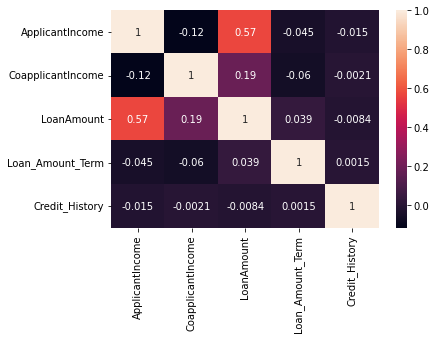

In [230]:
sns.heatmap(dataframe.corr(),annot=True)

In [231]:
selected_features = dataframe[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']] #feaures on which our reommedtation is dependent
selected_Loanstatus = dataframe['Loan_Status'] #The output that the user get input from our dataset

In [232]:
selected_features.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [233]:
selected_Loanstatus.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [234]:
#replacing the null field with 0
for feature in selected_features:
 dataframe[feature] = dataframe[feature].fillna(0)

In [235]:
cat_f = dataframe.select_dtypes(include='object')
categorical_cols = list(cat_f.columns.values.tolist())
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [236]:
input_col = list(dataframe.columns)[1:8] + list(dataframe.columns)[9:]
input_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [237]:
train_df = dataframe.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


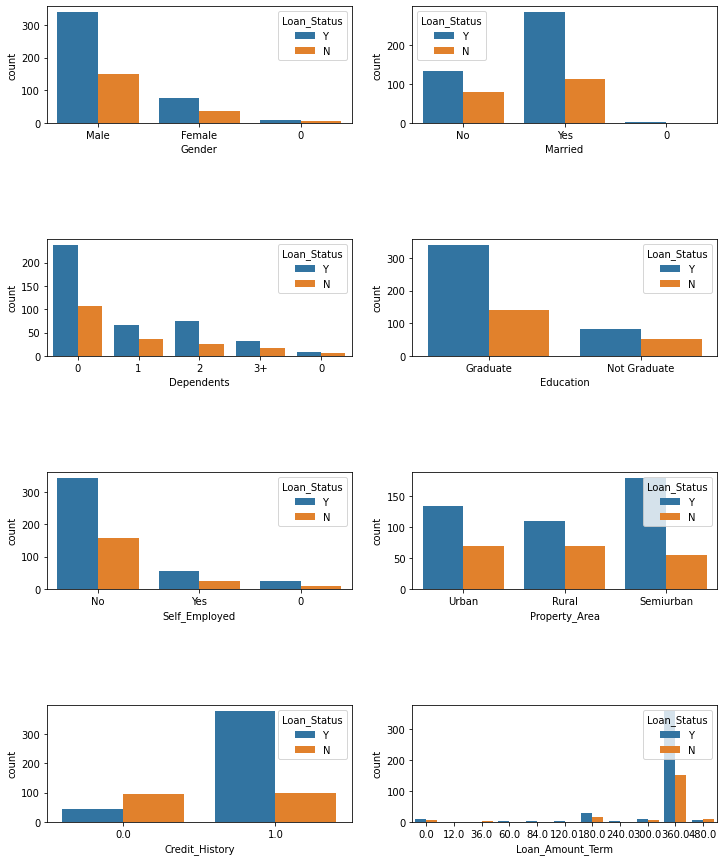

In [238]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=dataframe,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  141.166124
std        6109.041673        2926.248369   88.340630
min         150.000000           0.000000    0.000000
25%        2877.500000           0.000000   98.000000
50%        3812.500000        1188.500000  125.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


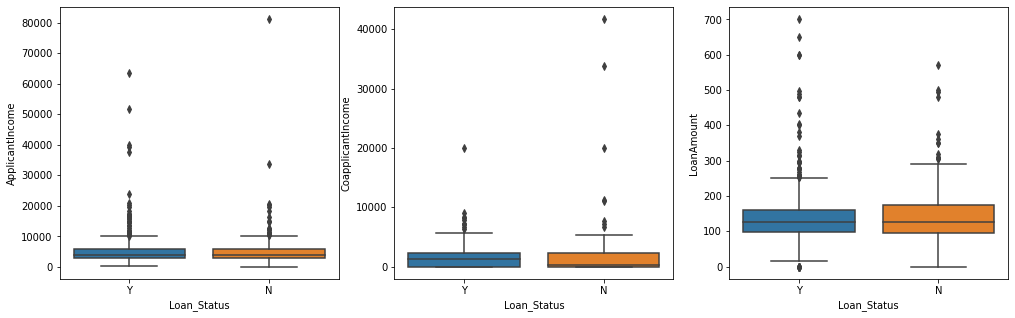

In [239]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=dataframe,x='Loan_Status',ax=axes[idx])

print(dataframe[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [240]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,0.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,1,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,0,0,1,1


In [241]:
dataframe['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [242]:
def encode(data): 
  label_encode = LabelEncoder()
  label = label_encode.fit_transform(data)
  return label

In [243]:
dataframe["Loan_ID"] = encode(dataframe["Loan_ID"])

In [244]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(X_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(X_test.shape)
print(y_test.shape)
#Random-state specifies the Randomness in the data set and the repetation of the data set for validation
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

(491, 18)
(491,)
(123, 18)
(123,)


In [245]:
output_col = ['LoanAmount']

## **Linear Regression**

In [380]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.20578773054842137

In [255]:
Reg_predict =reg.predict(X_train)
Reg_predict

array([0.70406999, 0.87049175, 0.35516644, 0.22651952, 0.90088143,
       0.83360035, 0.85937883, 0.30201907, 0.70778882, 0.89504812,
       0.65184037, 0.67285689, 0.71929363, 0.69845371, 0.85050359,
       0.47144402, 0.6785013 , 0.65713226, 0.38123494, 0.76389993,
       0.89852552, 0.72654585, 0.79625354, 0.71489787, 0.73113096,
       0.77312969, 0.36291477, 0.33123842, 0.29778534, 0.45105967,
       0.75817599, 0.75430285, 0.84486238, 0.70186937, 0.28895551,
       0.92894189, 0.3955712 , 0.48347114, 0.67418003, 0.17648417,
       0.75583475, 0.8060871 , 0.8005559 , 0.77656193, 0.58943598,
       0.73008994, 0.93121033, 0.7377109 , 0.29796134, 0.90026972,
       0.87652004, 0.24337803, 0.72609305, 0.83211872, 0.89698527,
       0.35855446, 0.34461369, 0.87627824, 0.93819533, 0.81509553,
       0.90373853, 0.70365426, 0.70156291, 0.89502579, 0.82669248,
       0.34401509, 0.93355375, 0.84337359, 0.52077552, 0.36581753,
       0.73123547, 0.3826443 , 0.89252164, 0.81057138, 0.86258

calculating the mean sqaure error

In [256]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, Reg_predict)

0.170971699802133

In [257]:
np.sqrt(mean_squared_error(y_train, Reg_predict))

0.4134872426111028

## **Prepare the dataset for training**

In [258]:
dataframe1 = dataframe.copy(deep=True).dropna()
for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
inputs_array = dataframe1.drop(['Loan_ID', 'LoanAmount' ], axis=1)
targets_array = dataframe1[['LoanAmount']].values
mean = inputs_array.mean()
dev = inputs_array.std()
inputs_array = (inputs_array - mean) / dev
inputs_array = inputs_array.values
inputs_array.shape, targets_array.shape

((614, 11), (614, 1))

In [259]:
inputs_array

array([[ 0.48254934, -1.31421482, -0.69281133, ...,  0.54051363,
         1.22230181,  0.67396981],
       [ 0.48254934,  0.72864062,  0.26960079, ...,  0.54051363,
        -1.31743867, -1.48132947],
       [ 0.48254934,  0.72864062, -0.69281133, ...,  0.54051363,
         1.22230181,  0.67396981],
       ...,
       [ 0.48254934,  0.72864062,  0.26960079, ...,  0.54051363,
         1.22230181,  0.67396981],
       [ 0.48254934,  0.72864062,  1.23201291, ...,  0.54051363,
         1.22230181,  0.67396981],
       [-1.66444554, -1.31421482, -0.69281133, ..., -1.84707894,
        -0.04756843, -1.48132947]])

In [260]:
num_rows = dataframe1.shape[0]
print(num_rows)

614


In [261]:
inputs = torch.from_numpy(inputs_array).float() 
targets = torch.from_numpy(targets_array).float()

In [262]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [263]:
inputs.size(), targets.size()

(torch.Size([614, 11]), torch.Size([614, 1]))

In [264]:
dataset = TensorDataset(inputs, targets)

In [265]:
val_percent = 0.15 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length
len(train_ds), len(val_ds)

(522, 92)

In [266]:
batch_size = 11

In [267]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
print(len(train_ds), len(val_ds))

522 92


In [268]:
print(len(input_col))

11


## **Create a Linear Regression Model**

In [269]:
class LoanModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(11, 1)                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                        # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)                        # fill this
        return {'val_loss': loss}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))


In [270]:
model = LoanModel()
model

LoanModel(
  (linear): Linear(in_features=11, out_features=1, bias=True)
)

In [271]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1322,  0.0314, -0.2122, -0.0797,  0.1955, -0.2884,  0.2855,  0.0100,
           0.0480,  0.0703, -0.0035]], requires_grad=True),
 Parameter containing:
 tensor([-0.0885], requires_grad=True)]

# **Train the model to fit the data**

In [272]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [273]:
result = evaluate(model, val_loader) # Use the the evaluate function
result

{'val_loss': 143.00225830078125}

In [274]:
epochs = 125
lr = 1e-1
history0 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 69.6062
Epoch [40], val_loss: 45.4639
Epoch [60], val_loss: 42.6730
Epoch [80], val_loss: 42.6557
Epoch [100], val_loss: 43.3984
Epoch [120], val_loss: 44.4399
Epoch [125], val_loss: 44.7119


In [275]:
epochs = 25
lr = 1e-2
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 44.7864
Epoch [25], val_loss: 44.8051


In [276]:
epochs = 25
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 44.8130
Epoch [25], val_loss: 44.8152


In [277]:
epochs = 100
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 44.8159
Epoch [40], val_loss: 44.8168
Epoch [60], val_loss: 44.8177
Epoch [80], val_loss: 44.8185
Epoch [100], val_loss: 44.8193


In [278]:
epochs = 100
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 44.8194
Epoch [40], val_loss: 44.8194
Epoch [60], val_loss: 44.8195
Epoch [80], val_loss: 44.8196
Epoch [100], val_loss: 44.8196


In [279]:
epochs = 200
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 44.8196
Epoch [40], val_loss: 44.8196
Epoch [60], val_loss: 44.8196
Epoch [80], val_loss: 44.8197
Epoch [100], val_loss: 44.8197
Epoch [120], val_loss: 44.8197
Epoch [140], val_loss: 44.8197
Epoch [160], val_loss: 44.8197
Epoch [180], val_loss: 44.8197
Epoch [200], val_loss: 44.8197


In [280]:
epochs = 200
lr = 1e-7
history6 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 44.8197
Epoch [40], val_loss: 44.8197
Epoch [60], val_loss: 44.8197
Epoch [80], val_loss: 44.8197
Epoch [100], val_loss: 44.8197
Epoch [120], val_loss: 44.8197
Epoch [140], val_loss: 44.8197
Epoch [160], val_loss: 44.8197
Epoch [180], val_loss: 44.8197
Epoch [200], val_loss: 44.8197


In [281]:
epochs = 400
lr = 1e-8
history7 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 44.8197
Epoch [40], val_loss: 44.8197
Epoch [60], val_loss: 44.8197
Epoch [80], val_loss: 44.8197
Epoch [100], val_loss: 44.8197
Epoch [120], val_loss: 44.8197
Epoch [140], val_loss: 44.8197
Epoch [160], val_loss: 44.8197
Epoch [180], val_loss: 44.8197
Epoch [200], val_loss: 44.8197
Epoch [220], val_loss: 44.8197
Epoch [240], val_loss: 44.8197
Epoch [260], val_loss: 44.8197
Epoch [280], val_loss: 44.8197
Epoch [300], val_loss: 44.8197
Epoch [320], val_loss: 44.8197
Epoch [340], val_loss: 44.8197
Epoch [360], val_loss: 44.8197
Epoch [380], val_loss: 44.8197
Epoch [400], val_loss: 44.8197


In [282]:
epochs = 400
lr = 1e-9
history8 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 44.8197
Epoch [40], val_loss: 44.8197
Epoch [60], val_loss: 44.8197
Epoch [80], val_loss: 44.8197
Epoch [100], val_loss: 44.8197
Epoch [120], val_loss: 44.8197
Epoch [140], val_loss: 44.8197
Epoch [160], val_loss: 44.8197
Epoch [180], val_loss: 44.8197
Epoch [200], val_loss: 44.8197
Epoch [220], val_loss: 44.8197
Epoch [240], val_loss: 44.8197
Epoch [260], val_loss: 44.8197
Epoch [280], val_loss: 44.8197
Epoch [300], val_loss: 44.8197
Epoch [320], val_loss: 44.8197
Epoch [340], val_loss: 44.8197
Epoch [360], val_loss: 44.8197
Epoch [380], val_loss: 44.8197
Epoch [400], val_loss: 44.8197


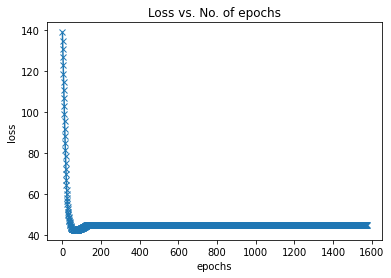

In [283]:
history = history0 + history1 + history2 + history3 + history4 + history5 + history6 + history7 + history8
loss = [result['val_loss'] for result in history]
plt.plot(loss, '-x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [284]:
val_loss = 31.4945

# **Make predictions using the trained model** 

In [285]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [286]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([ 0.4825,  0.7286,  1.2320,  1.8911, -0.1923, -0.5640, -0.0565, -0.4162,
        -1.8471,  1.2223,  0.6740])
Target: tensor([60.])
Prediction: tensor([101.2626])


In [287]:
input, target = val_ds[25]
predict_single(input, target, model)

Input: tensor([-1.6644, -1.3142,  0.2696,  1.8911, -0.1923, -0.1305, -0.5540,  0.3139,
         0.5405, -1.3174, -1.4813])
Target: tensor([81.])
Prediction: tensor([109.6721])


In [288]:
input, target = val_ds[32]
predict_single(input, target, model)

Input: tensor([ 0.4825,  0.7286,  0.2696, -0.5279,  2.1691, -0.7208,  0.4787,  0.3139,
         0.5405,  1.2223, -1.4813])
Target: tensor([110.])
Prediction: tensor([108.3915])


# **More Regression models**



## **Random Forest Regression**

In [332]:
data = []  # initialize a array to store the trained data 
Random_Forest = RandomForestRegressor() #creating the instances of RandomForest Regressor
#Random_Forest.fit(X_train.values,y_train.values)# it will train the model. Which can be used in predict() with a single arguement
Random_Forest.fit(X_train,y_train.ravel())

RandomForestRegressor()

In [333]:
#y_predict = Random_Forest.predict(x_test.values)
y_predict = Random_Forest.predict(X_train)
y_predict

array([0.91, 1.  , 0.09, 0.1 , 1.  , 0.9 , 0.92, 0.7 , 0.38, 0.85, 0.79,
       0.88, 0.96, 0.28, 1.  , 0.14, 0.73, 0.29, 0.64, 0.83, 0.28, 0.78,
       0.98, 0.34, 0.92, 0.23, 0.71, 0.78, 0.1 , 0.07, 0.92, 0.97, 0.97,
       0.22, 0.85, 0.98, 0.23, 0.25, 0.98, 0.15, 0.17, 0.84, 0.94, 0.4 ,
       0.92, 0.91, 0.97, 0.31, 0.75, 0.44, 0.85, 0.05, 0.93, 0.9 , 0.96,
       0.81, 0.02, 0.94, 0.92, 0.14, 1.  , 0.24, 0.31, 0.99, 0.97, 0.09,
       1.  , 0.87, 0.01, 0.82, 0.92, 0.11, 0.99, 0.98, 1.  , 0.87, 0.93,
       0.28, 0.95, 0.7 , 0.94, 0.92, 0.22, 0.94, 0.97, 0.91, 0.07, 1.  ,
       0.07, 0.96, 0.79, 0.34, 0.1 , 0.96, 0.99, 0.23, 0.92, 0.96, 0.99,
       0.99, 0.27, 0.96, 0.74, 0.17, 0.98, 0.82, 0.95, 0.94, 0.95, 0.32,
       0.14, 0.93, 0.94, 0.1 , 0.93, 0.88, 0.78, 0.93, 0.85, 0.24, 0.88,
       0.89, 0.9 , 0.98, 0.07, 0.32, 0.96, 0.3 , 0.99, 0.08, 0.96, 0.82,
       0.67, 0.98, 1.  , 0.91, 1.  , 0.95, 0.92, 0.57, 0.91, 1.  , 0.74,
       0.97, 0.99, 0.84, 0.98, 1.  , 0.96, 0.84, 0.

mean square eroor

In [334]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, y_predict)

0.028095926680244403

In [335]:
np.sqrt(mean_squared_error(y_train, y_predict))

0.16761839600784995

## **Decision tree regression**

In [336]:
from sklearn.tree import DecisionTreeRegressor 
Decision_tree = DecisionTreeRegressor(random_state = 0)
Decision_tree.fit(X_train,y_train.ravel())

DecisionTreeRegressor(random_state=0)

In [337]:
dec_predict =Decision_tree.predict(X_train)
dec_predict

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1.

mean square error

In [338]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, dec_predict)

0.0

In [339]:
np.sqrt(mean_squared_error(y_train, dec_predict))

0.0

## **SVM algorithm**

In [340]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
svm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svm.fit(X_train,y_train.ravel())
svm_predict=svm.predict(X_train)
svm_predict

array([0.80006021, 0.87700515, 0.08678776, 0.19995756, 0.89858263,
       0.74250752, 0.80029334, 0.24110468, 0.4144679 , 0.79988975,
       0.80043774, 0.80026558, 0.80005651, 0.79909079, 0.79994254,
       0.27094286, 0.79984216, 0.70071709, 0.45865973, 0.80020647,
       0.44167067, 0.79994006, 0.81503746, 0.64857966, 1.01183647,
       0.7799338 , 0.64778128, 0.80023443, 0.20698507, 0.13932841,
       0.79534619, 0.80001512, 0.79979626, 0.57829878, 0.79969844,
       0.87086634, 0.20204777, 0.19970873, 0.80021771, 0.19978533,
       0.39598602, 0.79998676, 0.81206373, 0.71961186, 0.7387604 ,
       0.60681763, 0.80562711, 0.77576725, 0.49439508, 0.80652081,
       0.75606883, 0.20009282, 0.796465  , 0.85699686, 0.90332058,
       0.55409009, 0.13099151, 0.93046741, 0.86029244, 0.43707237,
       0.91135608, 0.75669841, 0.48361693, 0.90067886, 0.78265562,
       0.0783204 , 0.86968575, 0.79998216, 0.20037983, 0.63430512,
       0.80038391, 0.20019052, 0.90625623, 0.82114271, 0.82193

mean square error

In [341]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, svm_predict)

0.1150687078258508

In [342]:
np.sqrt(mean_squared_error(y_train, svm_predict))

0.3392177881919679

## **K-Nearest Neighbor(KNN) Algorithm**

In [343]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [344]:
knn.score(X_train, y_train)

0.15419862037072707

In [345]:
knn_predict =knn.predict(X_train)
knn_predict

array([0.8, 0.8, 0.8, 0.4, 1. , 1. , 0.4, 1. , 0.6, 0.6, 0.8, 1. , 0.8,
       0.4, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.4, 1. , 0.4, 0.6, 0.6,
       0.6, 1. , 0.4, 0.4, 0.8, 1. , 0.8, 0.2, 0.8, 1. , 0.4, 0.8, 0.8,
       0.8, 0.4, 0.6, 0.6, 0.4, 0.4, 0.8, 1. , 0.6, 0.2, 0.8, 0.6, 0.2,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.2, 1. , 0.8, 0.4, 0.8, 1. ,
       0.6, 1. , 0.2, 0.6, 0.2, 0.6, 0.8, 1. , 1. , 0.6, 1. , 0.8, 0.8,
       0.8, 0.2, 0.8, 1. , 0.4, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 1. , 0.8,
       0.6, 0.6, 0.6, 1. , 0.4, 0.8, 1. , 0.8, 0.6, 0.6, 1. , 0.8, 0.2,
       0.8, 1. , 0.6, 1. , 0.6, 0.8, 0.6, 0.6, 0.8, 0.4, 0.8, 1. , 0.6,
       0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.6, 0.6, 0.6, 1. , 0.8,
       0.8, 0.8, 0.4, 0.4, 0.8, 0.4, 1. , 1. , 0.6, 0.4, 0.8, 1. , 0.4,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.8, 0.4,
       0.8, 0.8, 0.6, 0.8, 0.4, 0.8, 0.6, 0.6, 0.8, 0.8, 0.4, 0.8, 1. ,
       0.6, 0.8, 0.6, 0.8, 0.2, 0.4, 0.4, 0.6, 0.6, 0.6, 0.8, 1.

mean square eroor

In [346]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, knn_predict)

0.18207739307535642

In [347]:
np.sqrt(mean_squared_error(y_train, knn_predict))

0.4267052765965713

## **Gaussian Regression**

In [348]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gau = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train, y_train)

In [349]:
gaussian_predict= gau.predict(X_train)
gaussian_predict

array([0.70605988, 0.87285365, 0.35191283, 0.21695377, 0.90480487,
       0.83747268, 0.85514588, 0.29850483, 0.70944196, 0.90140747,
       0.6625755 , 0.69023833, 0.72300711, 0.70311021, 0.83181026,
       0.47500165, 0.68401625, 0.64100447, 0.3840083 , 0.76159704,
       0.90654329, 0.7158933 , 0.79449321, 0.71500804, 0.73587749,
       0.77382834, 0.36699532, 0.31601576, 0.28821611, 0.45190714,
       0.76172713, 0.75790414, 0.84927024, 0.66650547, 0.29234536,
       0.93212686, 0.39779565, 0.4839229 , 0.67365809, 0.17336896,
       0.75824153, 0.80534357, 0.80356279, 0.7794854 , 0.57521754,
       0.73163015, 0.93619389, 0.7369541 , 0.29970248, 0.9066455 ,
       0.88364964, 0.23862987, 0.72020569, 0.83727688, 0.90081304,
       0.36187461, 0.34908061, 0.88100648, 0.94044236, 0.81564968,
       0.90693046, 0.70397232, 0.6984054 , 0.89890314, 0.8306002 ,
       0.34448962, 0.93607973, 0.84798707, 0.5033397 , 0.36727041,
       0.73671743, 0.38560051, 0.89562505, 0.81351147, 0.86550

mean square error

In [350]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, gaussian_predict)

0.17116502767133876

In [351]:
np.sqrt(mean_squared_error(y_train, gaussian_predict))

0.41372095387028535

## **Lasso regression**

In [352]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1) #max_iter --> The maximum number of iterations, alphafloat:->default=1.0
#Constant that multiplies the L1 term, controlling regularization strength. alpha must be a non-negative float, tol:--> The tolerance for the optimization
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [353]:
lasso_reg.score(X_train,y_train)

0.0007401173337012734

In [354]:
lasso_predict= lasso_reg.predict(X_train)
lasso_predict

array([0.68861849, 0.68861769, 0.68618293, 0.68649084, 0.68546198,
       0.68596711, 0.68375862, 0.68558608, 0.68856396, 0.68059317,
       0.68816962, 0.68848309, 0.68640252, 0.68184971, 0.68531013,
       0.68537952, 0.67834212, 0.68856536, 0.68602621, 0.68395966,
       0.67757551, 0.68859972, 0.68632935, 0.68853063, 0.68707347,
       0.6855389 , 0.68253115, 0.68858603, 0.6825408 , 0.68292503,
       0.68862831, 0.68862186, 0.68861078, 0.6886142 , 0.68698127,
       0.68858357, 0.68860661, 0.68860356, 0.68858272, 0.68142799,
       0.68434558, 0.68654658, 0.68860704, 0.68447047, 0.6849207 ,
       0.68862056, 0.68337524, 0.68645432, 0.68861577, 0.68204464,
       0.68855234, 0.68861467, 0.68847094, 0.6826167 , 0.68741594,
       0.68655622, 0.68846552, 0.68551002, 0.68608223, 0.68860118,
       0.6886117 , 0.6878598 , 0.68321975, 0.68608535, 0.68858505,
       0.68860661, 0.68861246, 0.68860165, 0.68859575, 0.68861475,
       0.68857253, 0.68590642, 0.68636808, 0.68597794, 0.68600

In [355]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, lasso_predict)

0.21511271892275033

In [356]:
np.sqrt(mean_squared_error(y_train, lasso_predict))

0.46380245678817866

## **Ridge Regression**

In [357]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [358]:
ridge_predict=ridge.predict(X_train)

In [359]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, ridge_predict)

0.17105492837570793

In [360]:
np.sqrt(mean_squared_error(y_train, ridge_predict))

0.41358787261682123

## **Bayesian Ridge Regression**

In [361]:
from sklearn import linear_model
BayReg = linear_model.BayesianRidge()
BayReg.fit(X_train, y_train)
bayesian_predict= BayReg.predict(X_train)

mean square error

In [362]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, bayesian_predict)

0.17203584465884847

In [363]:
np.sqrt(mean_squared_error(y_train, bayesian_predict))

0.41477203938892565

## **Kernel Ridge Regression**

In [364]:
import sklearn
from sklearn.kernel_ridge import KernelRidge
kerReg = sklearn.kernel_ridge.KernelRidge(alpha=1,kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None)
kerReg.fit(X_train,y_train)
ker_predict = reg.predict(X_train)

In [365]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, ker_predict)

0.170971699802133

In [366]:
np.sqrt(mean_squared_error(y_train, ker_predict))

0.4134872426111028

## **Neural Network Regression**

In [367]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [368]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_train)

In [369]:
CNNReg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

In [370]:
y_pred=CNNReg.predict(X_testscaled)
y_pred

array([ 6.82114095e-01,  9.83802262e-01,  4.85784085e-02, -6.26242154e-02,
        9.76443111e-01,  9.72532037e-01,  9.23761714e-01,  8.85666480e-01,
       -7.42952140e-02,  7.33924875e-01,  9.34147473e-01,  9.68519988e-01,
        9.47171551e-01,  8.95936021e-02,  9.57607935e-01,  5.37365462e-02,
        9.60407989e-01, -1.03356117e-01,  9.71279233e-01,  9.48244708e-01,
        4.51936052e-02,  9.08250782e-01,  1.00139466e+00, -7.59401632e-02,
        9.80273368e-01,  6.60231254e-01,  9.84462294e-01,  9.58408644e-01,
        6.13348169e-02,  2.70248089e-02,  8.57958907e-01,  8.21840397e-01,
        7.06180942e-01, -5.15640794e-02,  9.93242404e-01,  9.94395527e-01,
       -1.80082184e-01,  5.36608410e-01,  1.02717675e+00, -4.24843795e-02,
       -4.96191528e-03,  6.86688738e-01,  6.39237642e-01,  2.02766402e-01,
        9.70812718e-01,  9.53867921e-01,  9.46767008e-01,  1.99663292e-01,
        9.45055117e-01,  3.26104599e-01,  6.94485833e-01, -4.04440085e-02,
        1.00377351e+00,  

mean square error

In [371]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, y_pred)

0.02637739237466822

In [372]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.16241118303450727

## **Polynomial Regression**

In [373]:
#"Enter the degree" of the polynomial
deg = int(5)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree= deg, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_fit = poly_reg_model.fit(poly_features, y_train)

In [374]:
poly_predict= poly_reg_model.predict(poly_features)
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, poly_predict)

0.016509138128899477

# **User Input based on regression type chose**

In [379]:
Loan_ID = str(input("Enter the Loan_ID: "))
Gender = str(input("Enter the Gender: "))
Married = bool(input("Enter the Married: "))
Dependents = int(input("Enter the Dependents: "))
Education = str(input("Enter the Education: "))
Self_Employed = bool(input("Enter the Self_Employed; "))
ApplicantIncome = int(input("Enter the ApplicantIncome: "))
CoapplicantIncome = int(input("Enter the CoapplicantIncome: "))
LoanAmount = int(input("Enter the LoanAmount: "))
Loan_Amount_Term = int(input("Enter the Loan_Amount_Term: "))
Credit_History = bool(input("Enter the Credit_History: "))
Property_Area = str(input("Enter the Property_Area: "))
arr=[Loan_ID,Gender, Education, Property_Area] #need to convert strings to numerical value
A = encode(arr) 
data = np.array([[A[0],A[1],A[2],A[3],Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term]])

TypeError: ignored

In [ ]:
print("1. Linear Regression")
print("2. Random Forest Regressor")
print("3. Lasso Regression")
print("4. Ridge Regression")
print("5. Decision Tree Algorithm")
print("6. SVM Regressor")
print("7. Polynomial Regression")
print("8. CNN Regression")
print("9. Bayesian Ridge Regression")
print("10. Kernel Ridge Regression")
print("11. KNN Regression")
print("Regression Type: ")
user_in = int(input())
if(user_in == 2):
  rand = Random_Forest.predict(data)
  print(rand)
elif(user_in == 6):
  rand = svm_predict.predict(data)
  print(rand)
elif(user_in == 1):
  rand = reg.predict(data)
  print(rand)
elif(user_in == 4):
  rand = ridge.predict(data)
  print(rand)
elif(user_in == 5):
  rand = Decision_tree.predict(data)
  print(rand)
elif(user_in == 9):
  rand = BayReg.predict(data)
  print(rand)
elif(user_in == 3):
  rand = lasso_reg.predict(data)
  print(rand)
elif(user_in == 7):
  rand = poly_reg_model.predict(data)
  print(rand) 
elif(user_in == 8):
  rand_2 = CNNReg.predict(data)
  print(rand_2)
elif(user_in == 10):
  rand_2 = kerReg.predict(data)
  print(rand_2)  
elif(user_in == 11):
  rand_2 = knn.predict(data)
  print(rand_2)